In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
#import Quantum_RR_2D as qrr
import schrodinger_2D as qrr
from datetime import datetime 
import scipy.fft as spfft
%matplotlib inline

In [2]:
#Constats in the units such that mass is in atomic mass unit (amu), 
#time is in micro seconds, distances are in micrometers. We call these notebook units
kB = 1.38064852e-23 #Boltzman's Constant
UK = (60e-6) #Trap depth in kelvin
U = kB*UK/(1.66e-27) #Potential depth, energy units converted to notebook units
hb = 6.62607004e-34*1e6/(2*np.pi*1.66e-27) #Plank's constant
wtrap = 2 #Gaussian trap wasit in micrometers
mK = 41 # mass of atom in amu
lm = 0.790 #wavelength of light forming the gaussian trap in micrometers
g = 9.806/1e6; #acceleration due to gravity in notebook units

In [3]:
def Vfun(X, Y, params):
        """
        This function returns the potential energies for a gaussian beam in 2D.
        
        Inputs
        ------
        X: np.array
            np.array of the X axis
        Y: np.array
            np.array of the Y axis
        params: list
            list of parameters for the potential energy function
        
        Returns
        -------
        V: np.array
            np.array of the potential energy of the 2D gaussian beam
        """
        Nx = len(X)
        Ny = len(Y)
        M = Nx * Ny
        V = np.zeros(M)
        vindex = 0
        w0 = params[1]
        l  = params[2]
        for i in range(Nx):
            for j in range(Ny):
                rsq = X[i]**2+Y[j]**2
                V[vindex] = -params[0]*np.exp(-2*rsq/(w0**2))-mK*g*Y[j]                              
                vindex = vindex + 1
        return V

In [4]:
#2D spatial grid to consider for the wavefunctions
samplerate = 800 # Number of points along one direction
xlim = 0.7 #boundary value of x
ylim = 0.7 #boundary value of y
xarray = np.arange(-xlim,xlim,2*xlim/samplerate)
yarray = np.arange(-ylim,ylim,2*ylim/samplerate)

In [5]:
start_time = datetime.now()
#Find the eigenvalues and Eigenfunctions
evl, evt = qrr.schrodinger2D(xarray,yarray, Vfun, [U,wtrap,lm], 60, hb, mK, -U,True)
time_elapsed = datetime.now() - start_time 
print('\r','Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed)) 
#only take eigenfunction which are likely to be trapped.
evtnewl0 = evt[:,evl<-0.02*U]
evalnewl0 = np.real(evl[evl<-0.02*U])
boundstatesnol0 = np.shape(evalnewl0)[0]
print('number of bound states -> %i'%boundstatesnol0)

 Time elapsed (hh:mm:ss.ms) 0:01:54.657333
number of bound states -> 60


In [6]:
evtnewl0_respahed = []
for n in range (evtnewl0.shape[1]):
    psi = evtnewl0[:, n]  
    psi = psi.reshape(samplerate, samplerate) 
    evtnewl0_respahed.append(psi)
evtnewl0_respahed = np.array(evtnewl0_respahed)

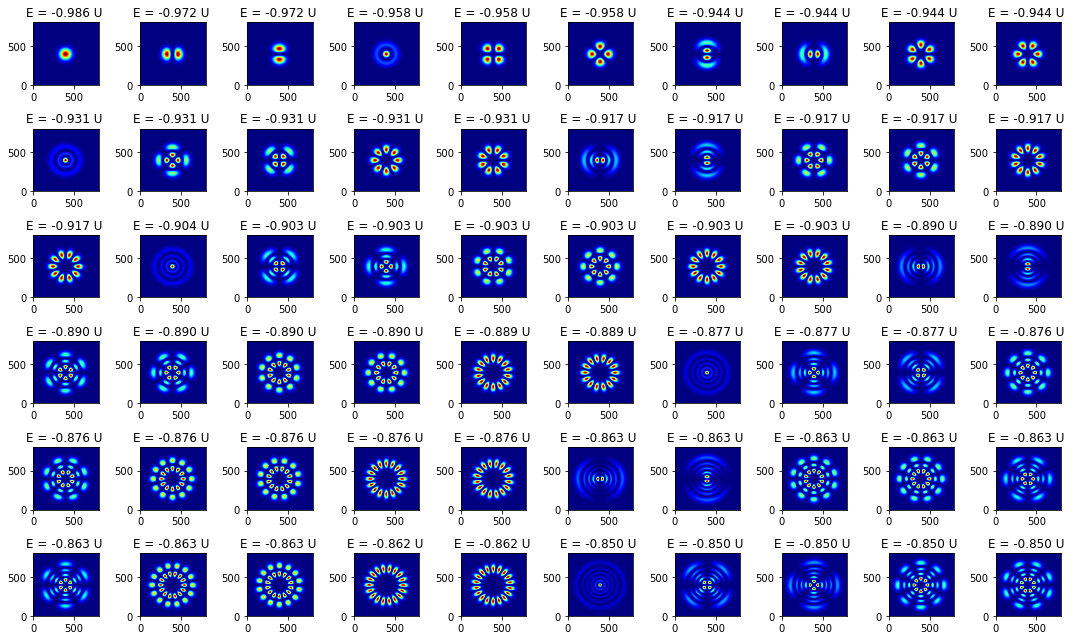

In [7]:
ntot = 60 #total number to show
fig = plt.figure(figsize = [15,9])
for n in range(ntot):
    psi = evtnewl0[:, n]  
    PSI = psi.reshape(samplerate, samplerate) 
    PSI = np.abs(PSI)**2
    plt.subplot(6, int(ntot / 6), n + 1)    
    plt.pcolormesh(np.transpose(PSI), cmap = "jet")
    #plt.axis("equal")
    plt.title('E = %.3f U '%(evalnewl0[n]/U))
    #plt.axis("off")
    #plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=-1)
plt.tight_layout()
plt.show()

In [10]:
np.save('Simulation_data/2D_evals_60uK.npy',evalnewl0)
np.save('Simulation_data/2D_evecs_60uK.npy',evtnewl0_respahed)
np.save('Simulation_data/2D_xlist_60uK.npy',xarray)
np.save('Simulation_data/2D_ylist_60uK.npy',yarray)

Thermal Distribution of the eigenstates, shows the probabilities of accoupying each level


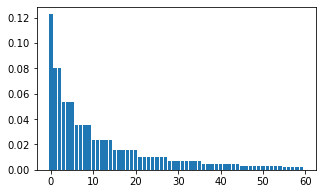

In [9]:
evall_zerod = np.real(evl-evl[0])
print('Thermal Distribution of the eigenstates, shows the probabilities of accoupying each level')
evall_zerod_SI = evall_zerod*(1.66e-27) # Convert energies to SI units
Tn = 2*1e-6 #Temperature in SI units

pl = np.exp(-evall_zerod_SI/(kB*Tn))#Probabilities
psum = np.sum(pl)
pl = pl/psum
fig, ax1 = plt.subplots(figsize=(5,3))
plt.bar(range(pl.shape[0]),pl)
plt.show()